# 다층 퍼셉트론(MLP) - 신경망
#### 대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들수 있다.
#### 충분한 연산 시간과 데이터를 주고 매개변수르 세심하게 조정하면 좋은 성능 낼수 있다.
#### 다만, 학습 시간이 오래 걸리고 , 데이터 전처리에 주의해야 합니다.

In [1]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
%matplotlib inline

C:\anaconda\envs\tf2.0\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\anaconda\envs\tf2.0\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

###### MLP 모델 생성  : hidden_layer_sizes=[10] 1개의 hidden layer에 10개의 unit ,  기본 activation Function : relu 

Text(0, 0.5, 'Feature 1')

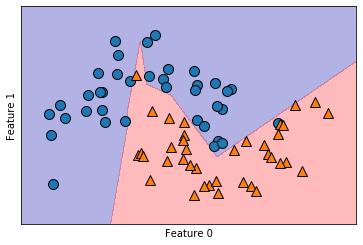

In [3]:
mlp = MLPClassifier(solver='lbfgs', max_iter=1000, activation='relu', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

###### 은닉 유닛이 10개인 신경망으로 학습시킨 two_moons 데이터셋의 결정 경계

###### 10개의 은닉 유닛을 가진 두개의 은닉층 : hidden_layer_sizes=[10, 10]

Text(0, 0.5, 'Feature 1')

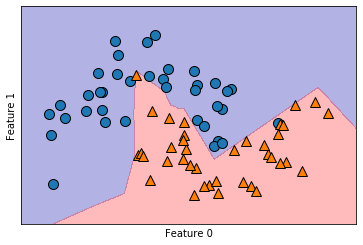

In [4]:
mlp = MLPClassifier(solver='lbfgs', max_iter=1000, activation='relu', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

###### 10개의 은닉 유닛을 가진 두개의 은닉층으로 만들 결정 경계

###### MPLClassifier에서 alpha 매개변수를 사용하여 L2 패널티와 같이 가중치를 0에 가깝게 만들어 모델의 복잡도 제어( alpha 값이 커질수록 복잡도가 적어짐)

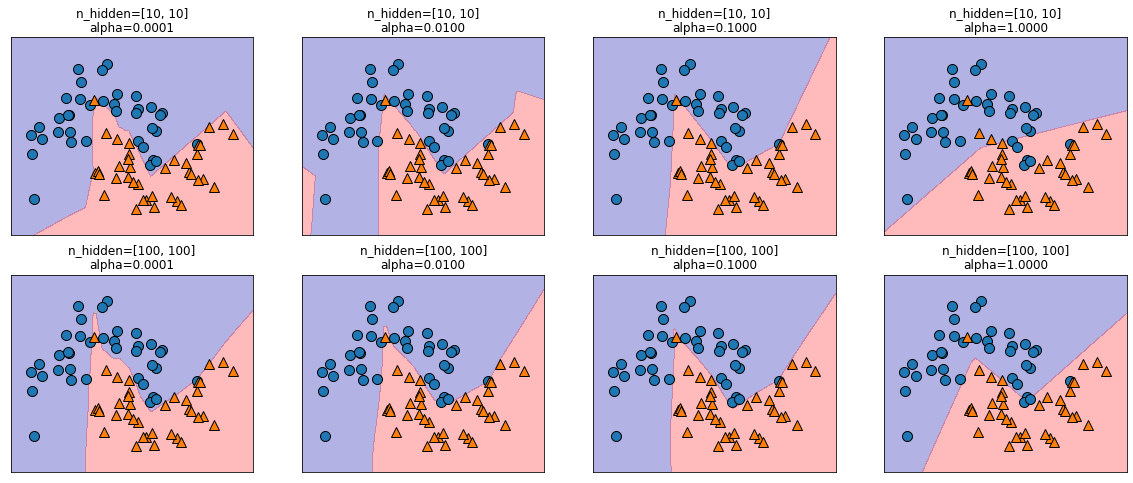

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

##### 신경망(MLP) 복잡도를 제어하는 방법 : 은닉층 수, 은닉층의 유닉 갯수, alpha,  가중치 초기값

###### 유방암 데이터셋에 MLPClassifier 적용

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [7]:
dir(cancer)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [8]:
type(cancer)

sklearn.utils.Bunch

In [9]:
cancer['data'].shape

(569, 30)

In [10]:
print("유방암 데이터의 특성별 최대값:\n", cancer.data.max(axis=0))

유방암 데이터의 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.927
테스트 세트 정확도: 0.930


###### 보다 정확도를 높이기 위해 StandardScaler 적용 : 평균 0, 분산 1

In [12]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

In [13]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [14]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [15]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.951


######  훈련세트 정확도가 1 이므로 과대적합되어 alpha로 규제 필요 (alpha 기본값: 0.0001) 

In [16]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965
